## Q1 Importing libraries and data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## Q2a

In [3]:
#Defining path
path = r'/Users/CK/Downloads/CF/Chapter6'

In [4]:
#Importing file
df = pd.read_csv(os.path.join(path,'02 Data' , 'House_Rent_Dataset.csv'), index_col = False)



In [5]:
df.shape

(4746, 12)

In [6]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Selecting a specific city and furnishing status for deeper analysis.


In [7]:
df_bangalore = df.loc[(df['City'] == 'Bangalore')]

In [8]:
df_bangalore.shape

(886, 12)

In [9]:
# Selecting only numeric columns for correlation
numeric_df = df_bangalore.select_dtypes(include=[np.number])

In [10]:
numeric_df.head()

,BHK,Rent,Size,Bathroom
1496,3,70000,3354,3
1497,2,10500,800,2
1498,2,13000,1000,2
1499,2,17000,1040,2
1500,3,21000,1403,3


## Q2 b Standardizing and Scaling the data 

In [11]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your numeric data and transform it
scaled_data = scaler.fit_transform(numeric_df)



In [20]:

# Convert the scaled data back to a DataFrame (optional, but often useful for readability)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

## Q3 and Q4 Elbow Technique

In [21]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [22]:
score = [kmeans[i].fit(scaled_data).score(scaled_data) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/CK/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/CK/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/CK/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/CK/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

[-3544.0,
 -2083.697388126287,
 -1259.4790253315082,
 -693.8112559114433,
 -446.19300304520027,
 -322.0376693009582,
 -256.3592749617659,
 -209.67374740885498,
 -176.82433429759976]

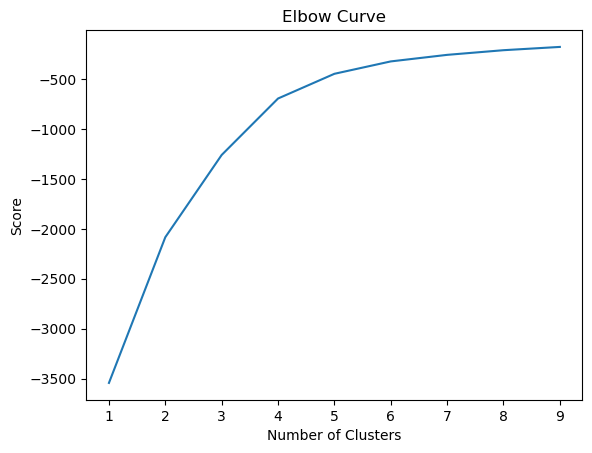

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a flattening of cuve happening after 6 count. Hence, I would consider 5 clusters for kmeans.

## Q5  k-means clustering

In [24]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 



In [25]:
# Fit the k-means object to the data.

kmeans.fit(scaled_data)

/Users/CK/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

## Q6

In [26]:
scaled_df['clusters'] = kmeans.fit_predict(scaled_data)

/Users/CK/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
scaled_df.head()

,BHK,Rent,Size,Bathroom,clusters
0,1.397112,0.375317,3.829404,1.535278,4
1,0.091372,-0.120565,-0.300659,0.262821,0
2,0.091372,-0.099729,0.022760,0.262821,0
3,0.091372,-0.066393,0.087444,0.262821,0
4,1.397112,-0.033056,0.674450,1.535278,3


In [31]:
# Export data to csv

scaled_df.to_csv(os.path.join(path, '02 Data','clusterdata.csv'))

In [32]:
scaled_df['clusters'].value_counts()

clusters
0    359
1    343
3    157
4     26
2      1
Name: count, dtype: int64

## Q7 and Q8

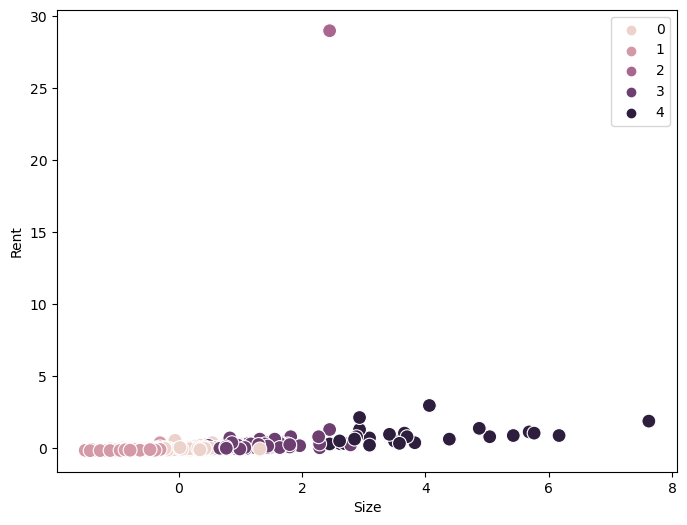

In [37]:
# Plot the clusters for the "Size" and "Rent" variables.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=scaled_df['Size'], y=scaled_df['Rent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Size') # Label x-axis.
plt.ylabel('Rent') # Label y-axis.
plt.show()

The clusters donot show deeper insights into the relationship of rent with size. The major insight is that you can find homes of various sizes in a given budget in Bangalore.

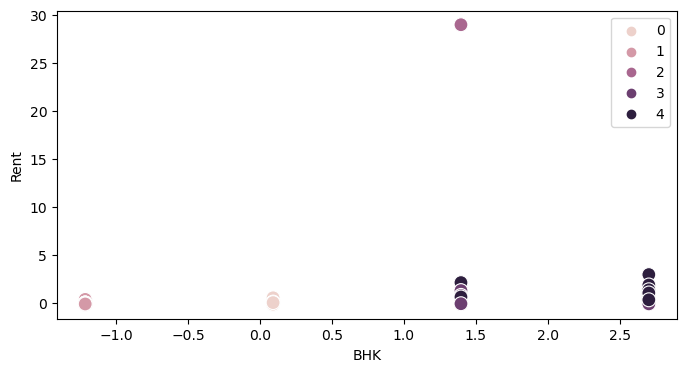

In [38]:
# Plot the clusters for the "BHK" and "Rent" variables.

plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=scaled_df['BHK'], y=scaled_df['Rent'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('BHK') 
plt.ylabel('Rent') 
plt.show()

The group 4 cluster is concentrated on BHK>2.5. There are hardly any 0 or 1 cluster above 1.5BHK. Anyways, the data needs further analysis since there are no strong insights that came up.

In [39]:
scaled_df.loc[scaled_df['clusters'] == 2, 'cluster'] = 'dark purple'
scaled_df.loc[scaled_df['clusters'] == 1, 'cluster'] = 'purple'
scaled_df.loc[scaled_df['clusters'] == 0, 'cluster'] = 'pink'
scaled_df.loc[scaled_df['clusters'] == 3, 'cluster'] = 'yellow'
scaled_df.loc[scaled_df['clusters'] == 4, 'cluster'] = 'green'

## Q9

In [40]:
scaled_df.groupby('cluster').agg({'Size':['mean', 'median'], 
                         'BHK':['mean', 'median'], 
                         'Bathroom':['mean', 'median'],
                          'Rent':['mean', 'median']})

Size                 BHK            Bathroom            \
                 mean    median      mean    median      mean    median   
cluster                                                                   
dark purple  2.448404  2.448404  1.397112  1.397112  1.535278  1.535278   
green        3.891600  3.539944  2.301086  2.702852  2.758794  2.807735   
pink        -0.009024  0.022760  0.102284  0.091372  0.223832  0.262821   
purple      -0.720812 -0.704934 -0.928856 -1.214367 -0.983667 -1.009636   
yellow       0.935338  0.831308  1.405429  1.397112  1.170561  1.535278   

                  Rent             
                  mean     median  
cluster                            
dark purple  28.961414  28.961414  
green         0.889309   0.792024  
pink         -0.065997  -0.083061  
purple       -0.126433  -0.137233  
yellow        0.095388   0.041951

The dataset was standardized before clustering, with a mean of 0 and a standard deviation of 1 across the dataset. Values can be interpreted relative to the dataset's mean (0) and standard deviation (1).

In a standardized dataset, both the mean and median reflect the center of the data for each cluster relative to the overall data's center. A close match between mean and median in a cluster suggests a symmetric distribution of values around the center within that cluster.

## Cluster-Specific Insights:
### Dark Purple Cluster:

Represents properties with significantly high "Rent" values, suggesting luxurious or highly sought-after homes. The size and BHK values are moderately above average, indicating comfortable living spaces.

### Green Cluster:

Features the largest properties in terms of "Size," "BHK," and "Bathroom," but with surprisingly modest "Rent" values. This could suggest spacious properties that are either located in less expensive areas or offer great value for money.

### Pink Cluster:

This cluster shows below-average "Size" but near-average "BHK" and "Bathroom" counts, with very low "Rent". The disparities between mean and median suggest some skewness. Properties here might be smaller, affordable units, likely apartments or studios.

### Purple Cluster:

Shows the lowest values across all features, suggesting small, possibly less appealing properties with the lowest "Rent." These might be studios or single-room apartments in less desirable locations.

### Yellow Cluster:

Represents moderately sized properties with relatively higher "BHK" and "Bathroom" counts and slightly above-average "Rent." This cluster could be indicative of family homes that offer a balance between size and cost.

## Q10. 
The results of cluster analysis couls be used in multiple ways. Below are some recommendations on how we could use this data:

Real Estate Agents and Platforms:

Personalized Marketing:
Tailor marketing strategies to highlight the unique features of properties in each cluster. For example, emphasize the luxurious aspects of "dark purple" cluster properties or the affordability and spaciousness of "green" cluster homes.
Recommendation Engines:
Improve online platforms' recommendation systems by aligning property suggestions with user preferences based on cluster characteristics. Users looking for affordable options could be shown properties from the "pink" and "purple" clusters.


Urban Planners and Local Governments:

Housing Policy Development:
Use the insights from the cluster analysis to inform housing policies, ensuring a balanced development that caters to various market segments. For instance, policies to encourage more "green" cluster type developments could address the need for affordable family homes.
Infrastructure Planning:
Plan infrastructure and services around the needs of the predominant property types in an area. Areas with a high concentration of "dark purple" cluster properties might benefit from premium services and amenities.

For All Stakeholders:
Market Segmentation:
Use the cluster analysis to segment the property market effectively, allowing for more targeted strategies in development, marketing, financing, and policy-making.
Trend Monitoring:
Continuously monitor how the distribution of properties among clusters changes over time to identify shifting trends in consumer preferences and market demand.
Customer Insights:
Conduct further analysis to understand the demographics and preferences of the occupants or owners of properties within each cluster, providing a deeper insight into customer needs and behaviors.